# Liner Regression Model For Insurance problem statements:

In [94]:
# Step 1: Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from util import rem_outlier,missing,out_info

In [95]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Imarticus Jaipur\ML\07 ML\06 Liner Regression\Linear Regression Project\Linear Regression Project\Dataset\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
# train test split
from sklearn.model_selection import train_test_split as tts
X = df.drop(columns = ["charges"])
y = df["charges"]
X_train, X_test, y_train,y_test = tts(X,y,
                                      test_size = 0.2, random_state = 42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
           

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [97]:
missing(df)

,col_name,%_missing_value,num_missing_value


In [98]:
out_info(X_train)

,col_name,skewness,method,num_out,out_%,uw,lw
0,bmi,0.27,iqr,6.0,0.560748,46.933125,13.768125
1,age,0.03,z_score,0.0,0.000000,81.578890,-2.864871
2,children,0.94,iqr,0.0,0.000000,5.000000,-3.000000


In [99]:
out_info(X_test)

,col_name,skewness,method,num_out,out_%,uw,lw
0,bmi,0.32,iqr,2.0,0.746269,47.993125,13.878125
1,age,0.17,z_score,0.0,0.000000,80.499667,-3.283249
2,children,0.95,iqr,0.0,0.000000,5.000000,-3.000000


In [100]:
out_info(df)

,col_name,skewness,method,num_out,out_%,uw,lw
0,charges,1.52,iqr,139.0,10.388640,34489.350562,-13109.150897
1,bmi,0.28,iqr,9.0,0.672646,47.290000,13.700000
2,age,0.06,z_score,0.0,0.000000,81.356907,-2.942856
3,children,0.94,iqr,0.0,0.000000,5.000000,-3.000000


<Axes: ylabel='bmi'>

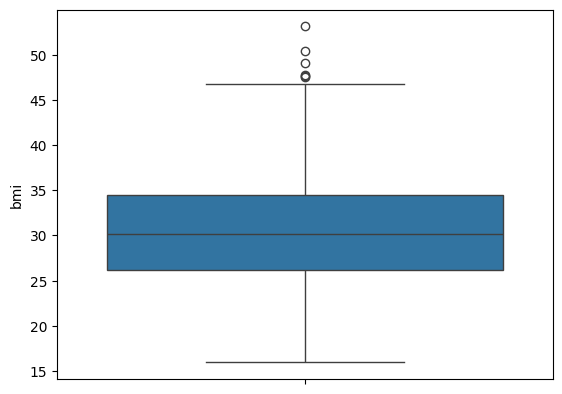

In [101]:
sns.boxplot(X_train["bmi"])

<Axes: xlabel='bmi', ylabel='charges'>

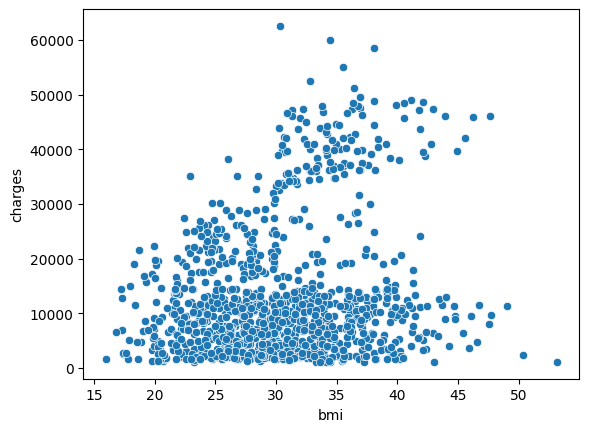

In [102]:
sns.scatterplot(x = X_train["bmi"], y = y_train)

<Axes: xlabel='bmi', ylabel='charges'>

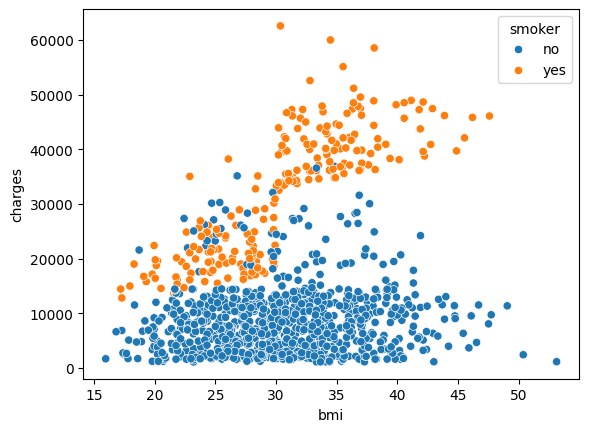

In [103]:
sns.scatterplot(x = X_train["bmi"], y = y_train, hue= X_train ["smoker"])

<Axes: ylabel='charges'>

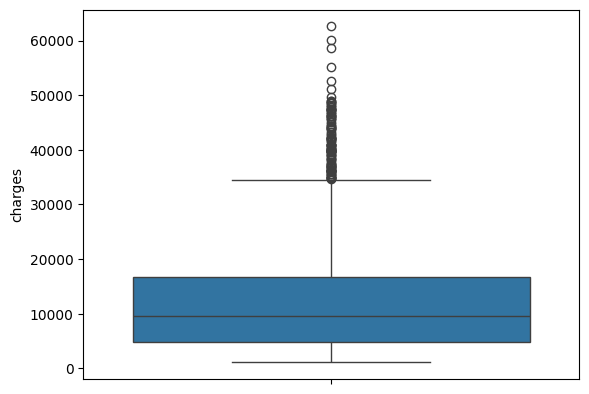

In [104]:
sns.boxplot(y_train)

In [105]:
a= out_info(pd.DataFrame(y_train))
a

,col_name,skewness,method,num_out,out_%,uw,lw
0,charges,1.52,iqr,111.0,10.373832,34520.142419,-12875.817631


In [106]:
def seriesoutliers(series):
  outlier_iqr = {}
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  outliers = series[(series < lb) | (series > ub)]
  outlier_iqr[series.name] = len(outliers)
  print(len(outliers))
  sns.boxplot(series)
  plt.show()
  # return outlier_iqr

111


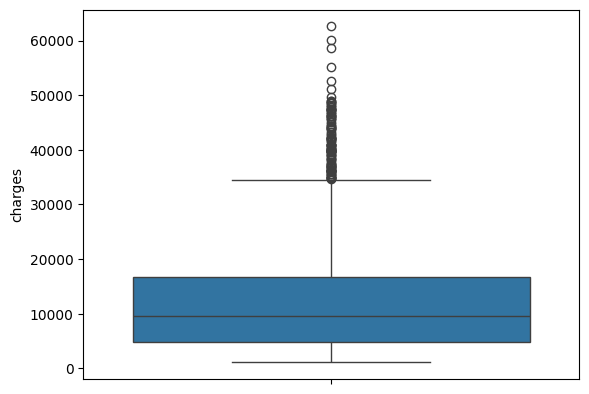

In [107]:
seriesoutliers(y_train)

15


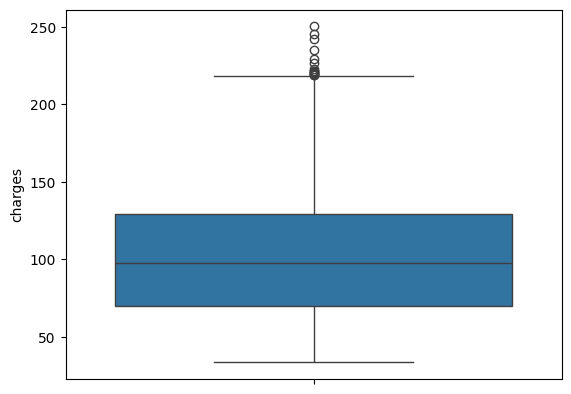

In [108]:
seriesoutliers(np.sqrt(y_train))

0


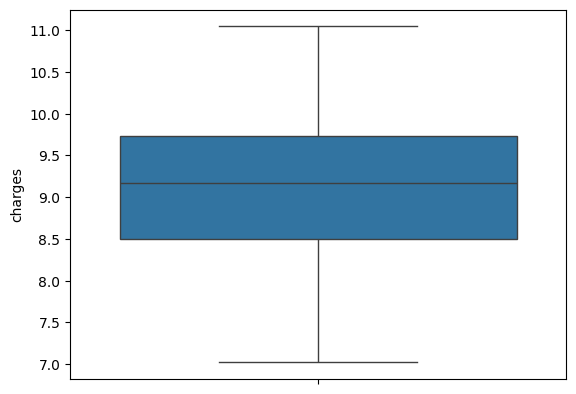

In [109]:
seriesoutliers(np.log(y_train))

0


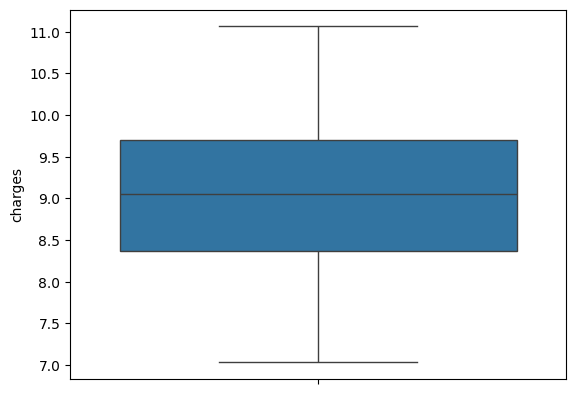

In [110]:
seriesoutliers(np.log(y_test))

In [111]:
y_train[:5]

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [112]:
np.log(y_train[:5])

560      9.126289
1285     9.051892
1142    10.207953
969      9.059149
486      9.431510
Name: charges, dtype: float64

In [113]:
np.exp(np.log(y_train[:5]))

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [114]:
X_train_cat = X_train.select_dtypes(include = "object")
X_test_cat = X_test.select_dtypes(include = "object")

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, drop = "first",
                    handle_unknown= "ignore")

X_train_enc = pd.DataFrame(ohe.fit_transform(X_train_cat), index = X_train_cat.index,
             columns = ohe.get_feature_names_out())
X_test_enc = pd.DataFrame(ohe.transform(X_test_cat), index = X_test_cat.index,
                          columns = ohe.get_feature_names_out())

In [116]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [117]:
cont = ["age", "bmi"] # continous
dis = ['sex', 'children', 'smoker', 'region'] #discrearte

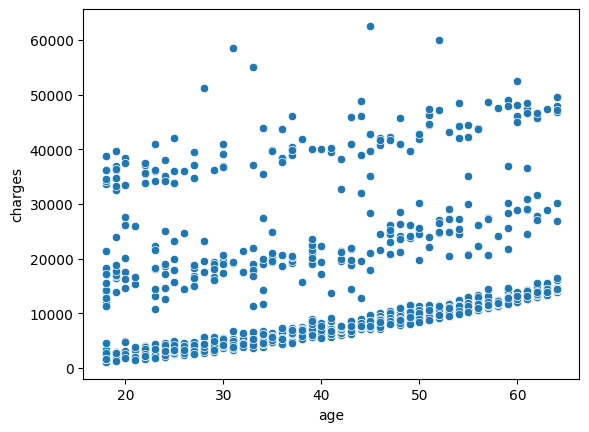

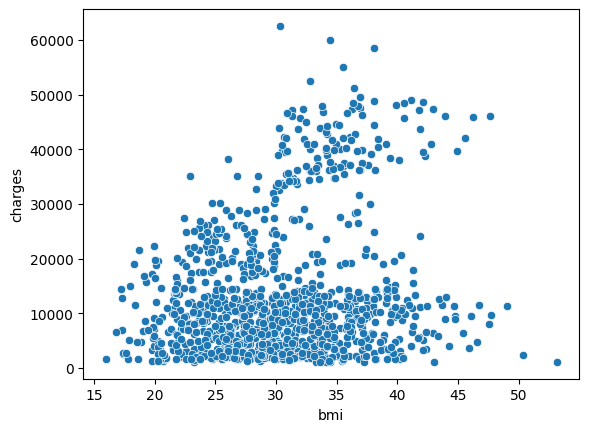

In [118]:
for col in cont:
  sns.scatterplot(x = X_train[col], y = y_train)
  plt.show()

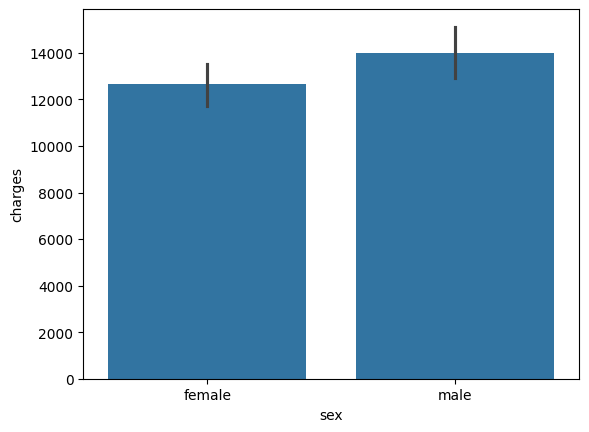

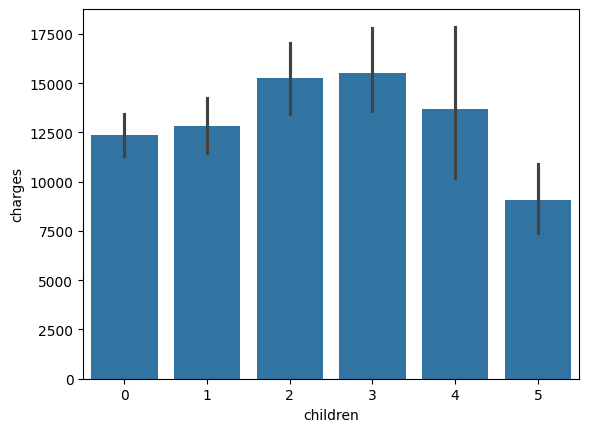

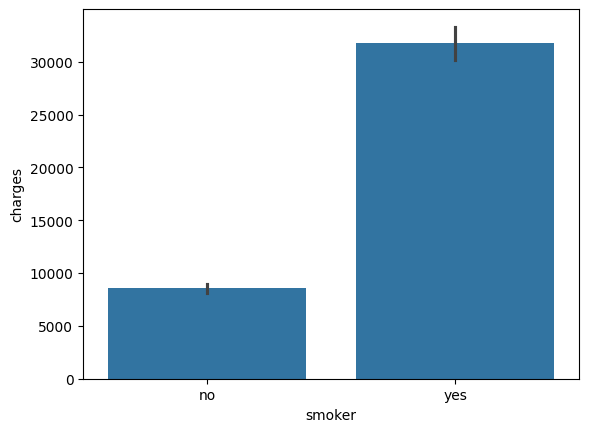

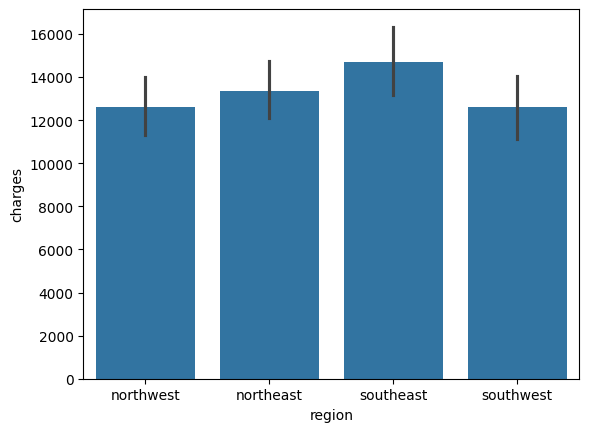

In [119]:
for col in dis:
  sns.barplot(x = X_train[col], y = y_train)
  plt.show()

In [120]:
# Insights for this data : 
# imp colomn with impact output clolumn (charges) - bmi, age , smoker 

In [121]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [122]:
X_train_enc

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.0,0.0,1.0,0.0,0.0
1285,0.0,0.0,0.0,0.0,0.0
1142,0.0,0.0,0.0,1.0,0.0
969,0.0,0.0,0.0,1.0,0.0
486,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,1.0,0.0
1294,1.0,0.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,1.0


In [123]:
pd.concat([X_train, X_train_enc], axis = 1)

,age,sex,bmi,children,smoker,region,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,female,19.950,2,no,northwest,0.0,0.0,1.0,0.0,0.0
1285,47,female,24.320,0,no,northeast,0.0,0.0,0.0,0.0,0.0
1142,52,female,24.860,0,no,southeast,0.0,0.0,0.0,1.0,0.0
969,39,female,34.320,5,no,southeast,0.0,0.0,0.0,1.0,0.0
486,54,female,21.470,3,no,northwest,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast,0.0,0.0,0.0,0.0,0.0
1130,39,female,23.870,5,no,southeast,0.0,0.0,0.0,1.0,0.0
1294,58,male,25.175,0,no,northeast,1.0,0.0,0.0,0.0,0.0
860,37,female,47.600,2,yes,southwest,0.0,1.0,0.0,0.0,1.0


In [124]:
X_train_clean = pd.concat([X_train, X_train_enc], axis = 1)
X_test_clean = pd.concat([X_test, X_test_enc], axis = 1)

In [125]:
cat_cols = X_train_cat.columns
X_train_clean.drop(columns = cat_cols, inplace = True)
X_test_clean.drop(columns = cat_cols, inplace = True)

In [126]:
X_train_clean

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,47,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,52,24.860,0,0.0,0.0,0.0,1.0,0.0
969,39,34.320,5,0.0,0.0,0.0,1.0,0.0
486,54,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,39,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,58,25.175,0,1.0,0.0,0.0,0.0,0.0
860,37,47.600,2,0.0,1.0,0.0,0.0,1.0


In [127]:
X_test_clean

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,0.0,0.0,0.0,0.0,0.0
887,36,30.020,0,0.0,0.0,1.0,0.0,0.0
890,64,26.885,0,0.0,1.0,1.0,0.0,0.0
1293,46,25.745,3,1.0,0.0,1.0,0.0,0.0
259,19,31.920,0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
109,63,35.090,0,1.0,1.0,0.0,1.0,0.0
575,58,27.170,0,0.0,0.0,1.0,0.0,0.0
535,38,28.025,1,1.0,0.0,0.0,0.0,0.0
543,54,47.410,0,0.0,1.0,0.0,1.0,0.0


In [128]:
#scaling procces : 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std_scale = std_scaler.fit_transform(X_train_clean)
X_test_std_scale = std_scaler.transform(X_test_clean)

In [129]:
# train MAE & test MAE
# train R2 & test R2
# train adj R2 test adj R2

In [130]:
result_df = pd.DataFrame({
    "Method": [],
    "Train_mae": [],
    "Test_mae":[],
    "Train_r2":[],
    "Test_r2":[],
    "Train_adj_r2":[],
    "Test_adj_r2":[]
})
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2


In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
def get_result(method, X_train, X_test, y_train, y_test, result_df = result_df):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_mae = mean_absolute_error(y_train, y_pred_train)
  test_mae = mean_absolute_error(y_test, y_pred_test)

  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  n_train, n_test = X_train.shape[0], X_test.shape[0]
  k_train, k_test = X_train.shape[1], X_test.shape[1]

  train_adj_r2 = 1 - ((1 - train_r2)* (n_train -1)/ (n_train - k_train -1))
  test_adj_r2 = 1 - ((1 - test_r2)* (n_test -1)/ (n_test - k_test -1))


  temp_df = pd.DataFrame({
    "Method": [method],
    "Train_mae": [train_mae],
    "Test_mae":[test_mae],
    "Train_r2":[train_r2],
    "Test_r2":[test_r2],
    "Train_adj_r2":[train_adj_r2],
    "Test_adj_r2":[test_adj_r2]
    })

  result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)

  return result_df

In [132]:
result_df = get_result(method = "baseline", X_train =X_train_clean ,
           X_test = X_test_clean, y_train = y_train, y_test = y_test)


In [133]:
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909


In [134]:
y_train.mean()

np.float64(13346.089736364485)

In [135]:
result_df = get_result(method = "std_scale", X_train =X_train_std_scale ,
           X_test = X_test_std_scale, y_train = y_train, y_test = y_test, result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909


In [136]:
# min max scalling
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
X_train_mm_scale = min_scaler.fit_transform(X_train_clean)
X_test_mm_scale = min_scaler.transform(X_test_clean)

In [137]:
result_df = get_result(method = "mm_scale", X_train =X_train_mm_scale ,
           X_test = X_test_mm_scale, y_train = y_train, y_test = y_test, result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
2,mm_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909


In [138]:
result_df = get_result(method = "log_transform y with std scaler ", X_train =X_train_std_scale ,
           X_test = X_test_std_scale, y_train = np.log(y_train), y_test = np.log(y_test), result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
2,mm_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
3,log_transform y with std scaler,0.282095,0.269692,0.757227,0.804731,0.755397,0.798700


In [139]:
np.exp(0.282095)

np.float64(1.3259046749479566)

In [140]:
model = LinearRegression()
model.fit(X_train_std_scale, np.log(y_train))
y_pred_train_log = model.predict(X_train_std_scale)
y_pred_test_log = model.predict(X_test_std_scale)

In [141]:
y_pred_train = np.exp(y_pred_train_log)
y_pred_test = np.exp(y_pred_test_log)

In [142]:
mean_absolute_error(y_train, y_pred_train)

4270.76645101563

In [143]:
mean_absolute_error(y_test, y_pred_test)

3888.77078051587

In [144]:
result_df = get_result(method = "sq_transform y with std scaler ", X_train =X_train_std_scale ,
           X_test = X_test_std_scale, y_train = np.sqrt(y_train), y_test = np.sqrt(y_test), result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
2,mm_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
3,log_transform y with std scaler,0.282095,0.269692,0.757227,0.804731,0.755397,0.798700
4,sq_transform y with std scaler,15.018609,14.888330,0.770106,0.812533,0.768372,0.806742


In [145]:
model = LinearRegression()
model.fit(X_train_std_scale, np.sqrt(y_train))
y_pred_train_log = model.predict(X_train_std_scale)
y_pred_test_log = model.predict(X_test_std_scale)

y_pred_train = (y_pred_train_log)**2
y_pred_test = (y_pred_test_log)**2

In [146]:
mean_absolute_error(y_train, y_pred_train)

3657.1604903020298

In [147]:
mean_absolute_error(y_test, y_pred_test)

3556.9640331678866

In [148]:
X_train_clean

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,47,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,52,24.860,0,0.0,0.0,0.0,1.0,0.0
969,39,34.320,5,0.0,0.0,0.0,1.0,0.0
486,54,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,39,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,58,25.175,0,1.0,0.0,0.0,0.0,0.0
860,37,47.600,2,0.0,1.0,0.0,0.0,1.0


In [149]:
#now we need to find important column which impact output column :
#1. Lesso

In [150]:
# lasso
# best model std_scale data with sqroot y col
X_train_std_scale = pd.DataFrame(X_train_std_scale, columns = X_train_clean.columns,
                    index = X_train_clean.index)

X_test_std_scale = pd.DataFrame(X_test_std_scale, columns = X_test_clean.columns,
                    index = X_test_clean.index)

y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

In [151]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 1.5)

lasso_model.fit(X_train_std_scale, y_train_sqrt)

lasso_model.coef_

array([18.23815954,  4.48650432,  2.172453  , -0.        , 34.90405936,
        0.        , -0.        , -0.        ])

In [152]:
mask = lasso_model.coef_ != 0
mask

array([ True,  True,  True, False,  True, False, False, False])

In [153]:
lasso_cols = X_train_std_scale.columns[mask]
lasso_cols

Index(['age', 'bmi', 'children', 'smoker_yes'], dtype='object')

In [154]:
# p values
# statsmodel
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [155]:
import statsmodels.api as sm

# Add a constant (intercept) to X
X_train_std_scale_sm = sm.add_constant(X_train_std_scale)  # Adds a column of 1s to X for the intercept term

# Fit OLS model
model = sm.OLS(y_train_sqrt, X_train_std_scale_sm).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:42:51   Log-Likelihood:                -4859.4
No. Observations:                1070   AIC:                             9737.
Df Residuals:                    1061   BIC:                             9782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              105.3747      0.697  

In [159]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression , f_regression

sk_mi = SelectKBest(mutual_info_regression, k=4)

sk_mi.fit(X_train_std_scale, y_train_sqrt)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001BE6E86A340>)

In [160]:
sk_mi.get_feature_names_out()

array(['age', 'children', 'sex_male', 'smoker_yes'], dtype=object)

In [161]:
sk_f = SelectKBest(f_regression, k=4)
sk_f.fit(X_train_std_scale, y_train_sqrt)
sk_f.get_feature_names_out()

array(['age', 'bmi', 'children', 'smoker_yes'], dtype=object)

In [162]:
lasso_cols

Index(['age', 'bmi', 'children', 'smoker_yes'], dtype='object')

In [163]:
result_df = get_result(method = "sq_transform y with std scaler with imp_cols ", X_train =X_train_std_scale[lasso_cols] ,
           X_test = X_test_std_scale[lasso_cols], y_train = np.sqrt(y_train), y_test = np.sqrt(y_test), result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
2,mm_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
3,log_transform y with std scaler,0.282095,0.269692,0.757227,0.804731,0.755397,0.798700
4,sq_transform y with std scaler,15.018609,14.888330,0.770106,0.812533,0.768372,0.806742
5,sq_transform y with std scaler with imp_cols,15.114637,15.082907,0.768207,0.807561,0.767337,0.804634


In [170]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = (2,3), include_bias = False)
X_train_imp = X_train_std_scale[lasso_cols]
X_test_imp = X_test_std_scale[lasso_cols]
X_train_poly = poly.fit_transform(X_train_imp)
X_test_poly = poly.transform(X_test_imp)

In [171]:
result_df = get_result(method = "degree (2,5) ", X_train =X_train_poly ,
           X_test = X_test_poly, y_train = np.sqrt(y_train), y_test = np.sqrt(y_test), result_df = result_df)
result_df

,Method,Train_mae,Test_mae,Train_r2,Test_r2,Train_adj_r2,Test_adj_r2
0,baseline,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
1,std_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
2,mm_scale,4208.234572,4181.194474,0.741726,0.783593,0.739778,0.776909
3,log_transform y with std scaler,0.282095,0.269692,0.757227,0.804731,0.755397,0.798700
4,sq_transform y with std scaler,15.018609,14.888330,0.770106,0.812533,0.768372,0.806742
5,sq_transform y with std scaler with imp_cols,15.114637,15.082907,0.768207,0.807561,0.767337,0.804634
6,degree (3),11.468573,11.039212,0.832720,0.861721,0.827225,0.841543
7,degree (4),11.468573,11.039212,0.832720,0.861721,0.827225,0.841543
8,degree (5),11.001828,11.775039,0.843603,0.794476,0.822894,0.613556
9,"degree (2,5)",11.468573,11.039212,0.832720,0.861721,0.827890,0.844217


In [172]:
model = LinearRegression()
model.fit(X_train_poly, np.sqrt(y_train))
y_pred_train_log = model.predict(X_train_poly)
y_pred_test_log = model.predict(X_test_poly)

y_pred_train = (y_pred_train_log)**2
y_pred_test = (y_pred_test_log)**2

mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)

(2602.012271604026, 2425.0803373041786)

In [173]:
model

LinearRegression()

In [174]:
# get predictions on new data
X_train_imp

,age,bmi,children,smoker_yes
560,0.472227,-1.756525,0.734336,-0.508747
1285,0.543313,-1.033082,-0.911192,-0.508747
1142,0.898745,-0.943687,-0.911192,-0.508747
969,-0.025379,0.622393,3.202629,-0.508747
486,1.040918,-1.504893,1.557100,-0.508747
...,...,...,...,...
1095,-1.518194,0.130717,2.379865,-0.508747
1130,-0.025379,-1.107579,3.202629,-0.508747
1294,1.325264,-0.891539,-0.911192,-0.508747
860,-0.167551,2.820864,0.734336,1.965613
